<a href="https://colab.research.google.com/github/ValdazoAmerico/speciality-classificator-multiclass/blob/main/especialidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.menos de 48hs de evolución
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path =  "/content/drive/MyDrive/bq-results-20211020-124020-s66814vnga07/bq-results-20211020-124020-s66814vnga07.csv"

In [ ]:
path_e = '/content/dataframe_entities.csv'

In [ ]:
path_n = "/content/drive/MyDrive/bq-results-20211108-093244-wt2pix39kvn1/bq-results-20211108-093244-wt2pix39kvn1.csv"

In [ ]:
df_e = pd.read_csv(path_e)

In [ ]:
dfe_ = df_e[df_e['entities'] != '500']

In [ ]:
dfe_ = dfe_[dfe_['entities'] != '[]']

In [ ]:
df_e['entities'][4]

"[{'word': 'palpitaciones', 'entity_group': 'antecedentes', 'score': 0.999999046, 'start': 39, 'end': 52, 'label_uma': 'Palpitaciones', 'concept_id': 80313002}, {'word': 'asma', 'entity_group': 'antecedentes', 'score': 0.999999523, 'start': 156, 'end': 160, 'label_uma': 'Asma', 'concept_id': 195967001}]"

In [ ]:
entities2label(df_e['entities'][4])

['Palpitaciones', 'Asma']

In [ ]:
def entities2label(txt):
  final = []
  print(txt)
  array = eval(txt)
  if len(array) > 1:
    for a in array:
      final.append(a['label_uma'])
  else:
    for a in array[0]:
      final.append(a['label_uma'])
  return final



In [ ]:
dfe_['labels'][4]

['Palpitaciones', 'Asma']

In [ ]:
list2string(dfe_['labels'][4])

'Palpitaciones, Asma'

In [ ]:
def list2string(lista):
  return ",".join(lista)

In [ ]:
def remove_repeated(lista):
  return list(set(lista))

In [ ]:
dfe_['labels_set'] = dfe_['labels'].apply(remove_repeated)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfe_['labels_string'] = dfe_['labels_set'].apply(list2string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df = dfe_['labels_string'].str.get_dummies(sep=',')

In [ ]:
len(dfe_)

1639

In [ ]:
len(dfe_.columns)

11

In [ ]:
len(new_df.columns)

255

In [ ]:
dfe_['labels'] = dfe_['entities'].apply(entities2label)

In [ ]:
df_n = pd.read_csv(path_n)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(df_n)

807133

In [ ]:
df_n = df_n[df_n['mr_epicrisis'].notnull()]

In [ ]:
df2 = df_n.groupby('patient_uid', as_index=False)['mr_epicrisis', 'mr_tratamiento', 'especialidad'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df2['uni'][1]

'paciente refiere mialgias tos cefalea fiebre motivo por el cual se comunica se recomienda control en 48 horas refeire cuadro de 24 hroas de mialgias cefalea fiebre y anosmia se indica aislamiento preventivo control en 72 horas apra realizar orden de hisopado paciente con sintomatolgica covid no requiere hisopado segun protovolo paciente llama para reclamar por certificado de trabajo'

In [ ]:
def unificar(a):
  string = ''
  for texto in a:
    string += texto
  return string

In [ ]:
df2['uni'] = df2['mr_epicrisis'].apply(unificar)

In [ ]:
pip install unidecode

     |████████████████████████████████| 235 kB 5.2 MB/s 


In [ ]:
import unidecode
df2['uni'] = df2['uni'].apply(unidecode.unidecode)

In [ ]:
df2['uni'] = df2['uni'].str.replace('\n', ' ')

In [ ]:
df2['uni'] = df2['uni'].str.lower()

In [ ]:
import re
df2['uni'] = df2['uni'].apply(remove_symbols)

In [ ]:
def remove_symbols(txt):
  return re.sub(r'[^\w]', ' ', txt)

In [ ]:
import re
re.sub(' +', ' ', 'The     quick brown    fox')
def remove_spaces(txt):
  txt = txt.strip()
  return re.sub(' +', ' ', txt)

In [ ]:
df2['uni'] = df2['uni'].apply(remove_spaces)

In [ ]:
df2.to_csv('df_epicrisis_for_ner.csv')

In [ ]:
df = df1.groupby('mr_motivos_de_consulta', group_keys=False).apply(lambda x: x.sample(min(len(x), 200)))

In [ ]:
df = df[df['mr_epicrisis'].notnull()]
df = df[df['mr_diagnostico'].notnull()]

In [ ]:
import unidecode
import re
def clean_txt(text):
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)  
    text = re.sub(' +', ' ', text)  
    return text.strip()

In [ ]:
df['total'] = df['mr_epicrisis'] + " " + df['mr_diagnostico']

In [ ]:
df['total'] = df['total'].apply(clean_txt)

In [ ]:
df['patient_sex'] = df['patient_sex'].replace('F', 0)

In [ ]:
df['patient_sex'] = df['patient_sex'].replace('M', 1)

In [ ]:
df['patient_sex'] = df['patient_sex'].replace('Otro', 0)

In [ ]:
df['patient_sex'] = df['patient_sex'].replace('O', 0)

In [ ]:
df = df.dropna(subset=['patient_age'])

In [ ]:
df = df.dropna(subset=['patient_sex'])

In [ ]:
df['patient_age'] = df['patient_age'].astype(int)

In [ ]:
df['patient_sex'] = df['patient_sex'].astype(int)

In [ ]:
df1 = df[df.groupby("especialidad")['especialidad'].transform('size') > 1]

In [ ]:
df1.especialidad.value_counts()

ginecologia      965
dermatologia     957
pediatria        623
traumatologia    468
nutricionista    396
cardiologia      337
hematologia      130
urologia         107
diabetologia      63
oftalmologia      23
Name: especialidad, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[['patient_age', 'patient_sex', 'total']], df1['especialidad'], random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

tfidf_transformer = TfidfVectorizer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train.total)
X_train_tfidf.toarray().shape

(3051, 6400)

In [ ]:
import numpy as np
x_train_all = np.concatenate((X_train_tfidf.toarray(), X_train[['patient_age', 'patient_sex']].to_numpy()), axis=1)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

X = csr_matrix(x_train_all)
svd = TruncatedSVD(300, random_state=42)
x_truncated = svd.fit_transform(X)
x_truncated

array([[ 3.00001881e+01,  7.77640212e-02, -5.30261562e-02, ...,
         1.23148678e-02,  1.10894310e-02,  4.38460748e-02],
       [ 5.10000169e+01,  1.70631726e-01,  7.00108203e-02, ...,
        -7.51409397e-04, -2.78488941e-03, -5.49233456e-03],
       [ 7.70028872e+01, -7.74574332e-01,  2.32341661e-02, ...,
         6.55467661e-02,  1.79446826e-02, -4.29575119e-02],
       ...,
       [ 5.00320137e+00, -9.87057101e-01,  6.35129495e-03, ...,
        -1.37355514e-03, -2.78239975e-02, -2.41660518e-03],
       [ 7.00029437e+01, -7.95872776e-01,  8.78514076e-03, ...,
        -1.76248733e-03,  9.66734338e-03, -9.55044731e-03],
       [ 7.60000613e+01,  2.12678174e-01, -9.87709657e-02, ...,
        -5.39139019e-02,  1.87331204e-04,  2.88029730e-02]])

In [ ]:
svc = LinearSVC().fit(x_truncated, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
x_train_all.shape

(3051, 6402)

In [ ]:
x_truncated.shape

(3051, 300)

In [ ]:
<texto_tfidf.toarray().tolist()
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

# con word embeddings probar con tisny

In [ ]:
texto = "pac con acne en rostro y tronco no refiere antec patologicos ni alergicos derm otros signos sintomas de la piel y faneras"
texto_tfidf = tfidf_transformer.transform([texto])
texto_tfidf.toarray()
patient_info = np.array([[25, 1]])
patient_input = np.concatenate((texto_tfidf.toarray(), patient_info), axis=1)
X = csr_matrix(patient_input)
inp = svd.transform(X)
svc.predict(inp)

array(['dermatologia'], dtype=object)

In [ ]:
def predict_function(arr):
  texto_tfidf = tfidf_transformer.transform([arr[2]])
  texto_tfidf.toarray()
  patient_info = np.array([[arr[0], arr[1]]])
  patient_input = np.concatenate((texto_tfidf.toarray(), patient_info), axis=1)
  X = csr_matrix(patient_input)
  inp = svd.transform(X)
  return svc.predict(inp)[0]

In [ ]:
y_test = list(y_test.values)

In [ ]:
len(y_test)

1018

In [ ]:
array = []
for x in X_test.values:
  array.append(predict_function(x))

In [ ]:
list(df1.especialidad.unique())

['dermatologia',
 'pediatria',
 'cardiologia',
 'traumatologia',
 'ginecologia',
 'urologia',
 'oftalmologia',
 'nutricionista',
 'hematologia',
 'diabetologia']

In [ ]:
target_names = list(df1.especialidad.unique())

Text(91.68, 0.5, 'predicted label')

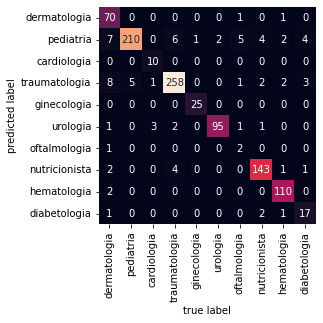

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns
mat = confusion_matrix(y_test, array)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names,yticklabels=target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,array))

               precision    recall  f1-score   support

  cardiologia       0.97      0.76      0.85        92
 dermatologia       0.87      0.98      0.92       215
 diabetologia       1.00      0.71      0.83        14
  ginecologia       0.92      0.96      0.94       270
  hematologia       1.00      0.96      0.98        26
nutricionista       0.92      0.98      0.95        97
 oftalmologia       0.67      0.20      0.31        10
    pediatria       0.95      0.94      0.94       152
traumatologia       0.98      0.94      0.96       117
     urologia       0.81      0.68      0.74        25

     accuracy                           0.92      1018
    macro avg       0.91      0.81      0.84      1018
 weighted avg       0.92      0.92      0.92      1018

